# Analysing Les Miserables Novel/Movie data using NetworkX 

## Loading Networkx library and dataset
### Networkx is a library used for graph analysis
#### Dataset is LesMiserables Novel Characters(Node are characters)... one character link to other characters in storyline of the book is the relationship btw the node of the graph(edges/connections)

In [1]:
import networkx as nx
G = nx.read_gml('./lesmiserables/lesmiserables.gml', label='label')

## A peek at graph data.... Numb of node and number of edges

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


## Graph representation of data

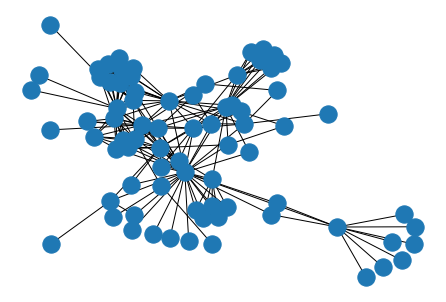

In [5]:
import matplotlib as pl
%matplotlib inline

nx.draw(G,pos=nx.spring_layout(G))

### Graph with labels (character names in Les Miserables)

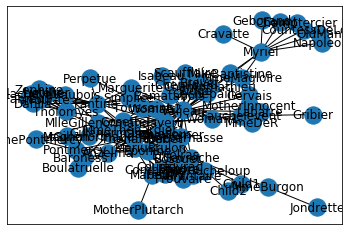

In [10]:
nx.draw_networkx(G,pos=None,with_labels=True)

{'Myriel': Text(0.40703092773290056, 0.5949537755517929, 'Myriel'),
 'Napoleon': Text(0.6517964888815301, 0.6519345024704356, 'Napoleon'),
 'MlleBaptistine': Text(0.285979267791032, 0.3922214552972564, 'MlleBaptistine'),
 'MmeMagloire': Text(0.2360241529176727, 0.4241646306810539, 'MmeMagloire'),
 'CountessDeLo': Text(0.5220711382735529, 0.8692175811916052, 'CountessDeLo'),
 'Geborand': Text(0.38643247671540276, 0.8625260068254054, 'Geborand'),
 'Champtercier': Text(0.5842157892564278, 0.7527995684609429, 'Champtercier'),
 'Cravatte': Text(0.5716080275755834, 0.8157262633065164, 'Cravatte'),
 'Count': Text(0.45774556024393404, 0.8352872243110661, 'Count'),
 'OldMan': Text(0.6588744924082252, 0.7323848230389429, 'OldMan'),
 'Labarre': Text(-0.1636172718800446, 0.29678555973696874, 'Labarre'),
 'Valjean': Text(0.049723477447981626, 0.09629835056113444, 'Valjean'),
 'Marguerite': Text(0.30136028249260133, -0.07349127233703852, 'Marguerite'),
 'MmeDeR': Text(0.36208768817609366, 0.15529198

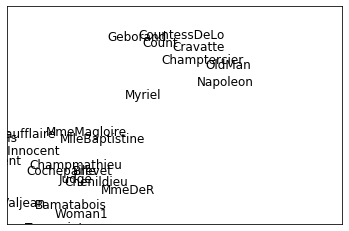

In [11]:
nx.draw_networkx_labels(G,pos=nx.spring_layout(G))

In [12]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg

characters = np.array(list(G.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(G, dtype=np.float64)

## Viewing all characters (Nodes of graph)

In [13]:
characters

array(['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire',
       'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count',
       'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau',
       'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville',
       'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier',
       'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois',
       'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge',
       'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy',
       'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent',
       'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand',
       'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois',
       'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras',
       'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel',
       'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer',
       'Babet', 'C

In [14]:
print(Adj.todense())

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
import pandas as pd
pd.DataFrame(characters[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,Labarre,Valjean,Marguerite,MmeDeR,Isabeau,Gervais,Tholomyes,Listolier,Fameuil,Blacheville


In [16]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

In [18]:
Deginv

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 77 stored elements in Compressed Sparse Row format>

In [19]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

C:\Users\medas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

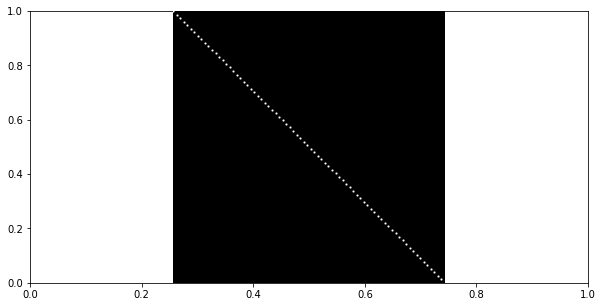

In [21]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

C:\Users\medas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

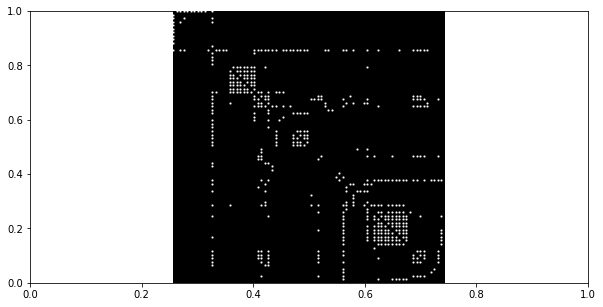

In [22]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

In [23]:
dense = Adj.todense()
for i in range(77):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[01111111110100000000000000000000000000000000000000000000000000000000000000000]] 10
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10010000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10100000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[00000000000100000000000000000000000000000000000000000000000000000000000000000]] 1
[[1011000000101111000000011111110111111110000110001101000100100000100011111

In [24]:
Trans = (Deginv @ Adj).T
Trans

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 508 stored elements in Compressed Sparse Column format>

In [25]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0.1, 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [26]:
from scipy.sparse.linalg import spsolve

n = len(characters)

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

charrank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

In [27]:
in_degrees = np.ravel(Adj.sum(axis=0))

In [28]:
# import pandas as pd
for i, (c, d, cr) in enumerate(zip(characters, in_degrees, charrank)):
    print(i, c, '(' + str(d) + ')', cr)

0 Myriel (10.0) 0.042779281022712105
1 Napoleon (1.0) 0.005584290834982478
2 MlleBaptistine (3.0) 0.010277134629737837
3 MmeMagloire (3.0) 0.010277134629737837
4 CountessDeLo (1.0) 0.005584290834982478
5 Geborand (1.0) 0.005584290834982478
6 Champtercier (1.0) 0.005584290834982478
7 Cravatte (1.0) 0.005584290834982478
8 Count (1.0) 0.005584290834982478
9 OldMan (1.0) 0.005584290834982478
10 Labarre (1.0) 0.003729040931048254
11 Valjean (36.0) 0.07543012163278472
12 Marguerite (2.0) 0.005260327543023242
13 MmeDeR (1.0) 0.0037290409310482536
14 Isabeau (1.0) 0.003729040931048254
15 Gervais (1.0) 0.0037290409310482553
16 Tholomyes (9.0) 0.01564742736848246
17 Listolier (7.0) 0.012618202914107778
18 Fameuil (7.0) 0.01261820291410778
19 Blacheville (7.0) 0.01261820291410778
20 Favourite (7.0) 0.01261820291410778
21 Dahlia (7.0) 0.012618202914107778
22 Zephine (7.0) 0.01261820291410778
23 Fantine (15.0) 0.027022704917205684
24 MmeThenardier (11.0) 0.019501134691061097
25 Thenardier (16.0) 0.

In [29]:
def charrank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of predators)')

In [30]:
characters

array(['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire',
       'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count',
       'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau',
       'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville',
       'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier',
       'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois',
       'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge',
       'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy',
       'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent',
       'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand',
       'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois',
       'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras',
       'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel',
       'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer',
       'Babet', 'C

## Looking into characters potrayed by Hughjackman, anna hathway, russell crowe, amanda seyfried

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


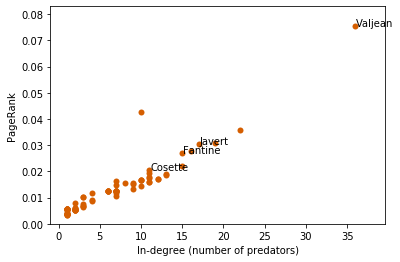

In [31]:
fav_actors = ["Valjean","Fantine","Javert","Cosette"]
charrank_plot(in_degrees, charrank, characters, annotations=fav_actors)

# since hugh jackman is a good actor they choose him to act as valjean

### These Four characters are most appearing characters so they hired good actors for these roles

## Hughjackman, anna hathway, russell crowe, amanda seyfried